In [1]:
#Importing the required libraries

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
from IPython.display import HTML,display

warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("processed.csv",parse_dates=True)
df['Date']=pd.to_datetime(df['Date'])


In [3]:
#Keeping only the columns needed
df=df[['Date','AQI']]
df.set_index('Date',inplace=True)

In [4]:
# df.drop(['City'],axis=1,inplace=True)
# df.set_index('Date',inplace=True)

In [5]:
df

,AQI
Date,
2015-03-21,91.0
2015-03-22,120.0
2015-03-23,154.0
2015-03-24,119.0
2015-03-25,232.0
...,...
2020-06-27,51.0
2020-06-28,61.0
2020-06-29,65.0


In [6]:
df['AQI'].fillna(method='bfill',inplace=True)

In [7]:
df.isnull().sum()

AQI    0
dtype: int64

In [8]:
#monthly average
df=df.astype('float64')
#df=df.resample(rule='MS').mean()

In [9]:
df['AQI'].fillna(method='bfill',inplace=True)

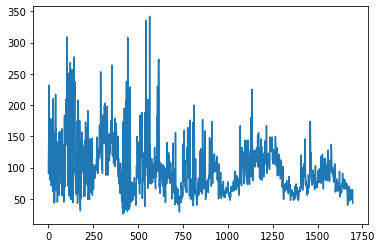

In [10]:
df1=df.reset_index()['AQI']
#df1=df['AQI']
plt.plot(df1)

In [11]:
df1

0        91.0
1       120.0
2       154.0
3       119.0
4       232.0
        ...  
1692     51.0
1693     61.0
1694     65.0
1695     63.0
1696     43.0
Name: AQI, Length: 1697, dtype: float64

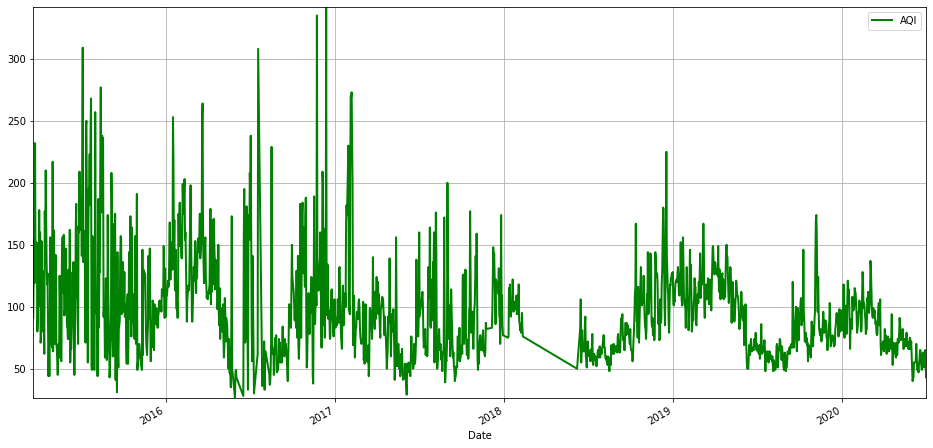

In [12]:
ax=df[['AQI']].plot(figsize=(16,8),grid=True,lw=2,color='Green')
ax.autoscale(enable=True,axis='both',tight=True)

***Preprocessing***

In [141]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

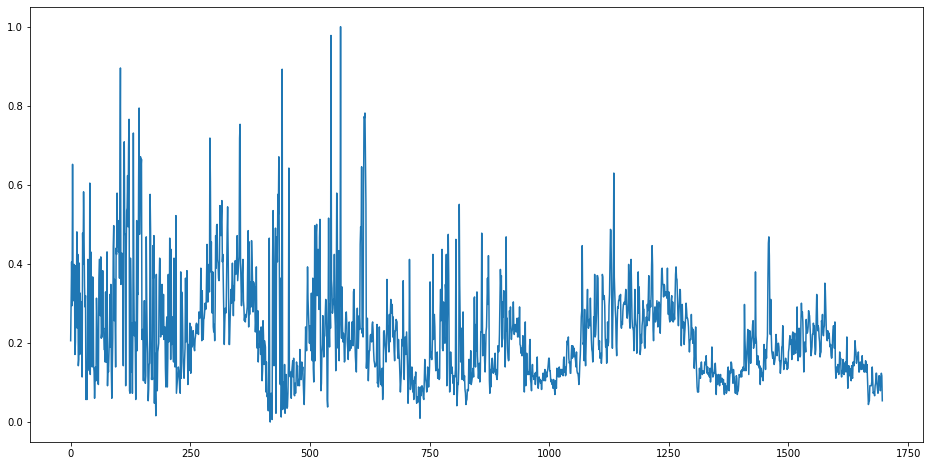

In [14]:
plt.figure(figsize=(16,8))
plt.plot(df1)

In [15]:
df1.shape

(1697, 1)

In [16]:
print(df1)

[[0.2056962 ]
 [0.29746835]
 [0.40506329]
 ...
 [0.12341772]
 [0.11708861]
 [0.05379747]]


In [17]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [18]:
training_size,test_size


(1187, 510)

In [19]:
train_data
test_data

array([[0.27531646],
       [0.34177215],
       [0.2721519 ],
       [0.17088608],
       [0.1835443 ],
       [0.22151899],
       [0.19936709],
       [0.24367089],
       [0.25632911],
       [0.30696203],
       [0.28481013],
       [0.28481013],
       [0.19303797],
       [0.18670886],
       [0.23101266],
       [0.25      ],
       [0.26582278],
       [0.24367089],
       [0.29746835],
       [0.28164557],
       [0.31329114],
       [0.37025316],
       [0.25632911],
       [0.27848101],
       [0.30696203],
       [0.29113924],
       [0.32278481],
       [0.39873418],
       [0.44620253],
       [0.39556962],
       [0.23417722],
       [0.2056962 ],
       [0.25      ],
       [0.27531646],
       [0.29113924],
       [0.25316456],
       [0.25949367],
       [0.28164557],
       [0.30696203],
       [0.27531646],
       [0.24050633],
       [0.29746835],
       [0.30379747],
       [0.2943038 ],
       [0.29746835],
       [0.22468354],
       [0.27531646],
       [0.325

In [20]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [21]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
# time_step = 100
time_step = 7
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [22]:
print(X_train.shape), print(y_train.shape)

(1179, 7)
(1179,)


(None, None)

In [23]:
print(X_train), print(y_train)

[[0.2056962  0.29746835 0.40506329 ... 0.65189873 0.33544304 0.30696203]
 [0.29746835 0.40506329 0.2943038  ... 0.33544304 0.30696203 0.39873418]
 [0.40506329 0.2943038  0.65189873 ... 0.30696203 0.39873418 0.37025316]
 ...
 [0.23101266 0.18037975 0.25632911 ... 0.26265823 0.24683544 0.23734177]
 [0.18037975 0.25632911 0.33544304 ... 0.24683544 0.23734177 0.17405063]
 [0.25632911 0.33544304 0.26265823 ... 0.23734177 0.17405063 0.20886076]]
[0.39873418 0.37025316 0.17088608 ... 0.17405063 0.20886076 0.29746835]


(None, None)

In [24]:
print(X_test.shape), print(ytest.shape)

(502, 7)
(502,)


(None, None)

In [25]:
#LSTM expects a 3D input 
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [26]:
print(X_train.shape,X_test.shape)

(1179, 7, 1) (502, 7, 1)


In [27]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [28]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(50,return_sequences=True))
#model.add(LSTM(50,return_sequences=False))
#model.add(Dense(25))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 7, 50)             10400     
                                                                 
 lstm_1 (LSTM)               (None, 7, 50)             20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=25,batch_size=32,verbose=1)

Epoch 1/25
37/37 [==============================] - 6s 46ms/step - loss: 0.0234 - val_loss: 0.0096
Epoch 2/25
37/37 [==============================] - 0s 13ms/step - loss: 0.0169 - val_loss: 0.0035
Epoch 3/25
37/37 [==============================] - 0s 12ms/step - loss: 0.0159 - val_loss: 0.0030
Epoch 4/25
37/37 [==============================] - 0s 12ms/step - loss: 0.0155 - val_loss: 0.0030
Epoch 5/25
37/37 [==============================] - 0s 12ms/step - loss: 0.0155 - val_loss: 0.0042
Epoch 6/25
37/37 [==============================] - 0s 13ms/step - loss: 0.0157 - val_loss: 0.0028
Epoch 7/25
37/37 [==============================] - 0s 12ms/step - loss: 0.0153 - val_loss: 0.0030
Epoch 8/25
37/37 [==============================] - 0s 13ms/step - loss: 0.0152 - val_loss: 0.0030
Epoch 9/25
37/37 [==============================] - 0s 12ms/step - loss: 0.0151 - val_loss: 0.0031
Epoch 10/25
37/37 [==============================] - 0s 13ms/step - loss: 0.0152 - val_loss: 0.0027
Epoch 11/

In [31]:
import tensorflow as tf

In [32]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [33]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [34]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

102.69930144558568

In [35]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

89.91043021220793

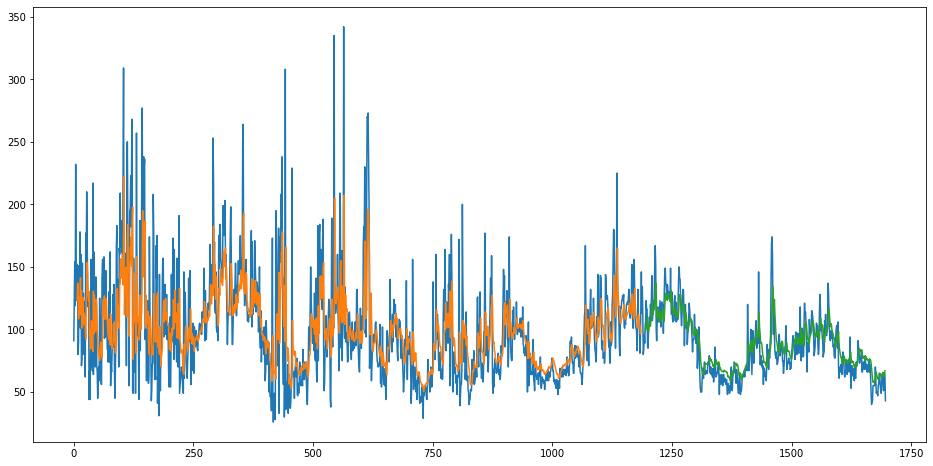

In [36]:
### Plotting 
# shift train predictions for plotting
look_back=X_train.shape[1]
# look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.figure(figsize=(16,8))
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [37]:
len(test_data)

510

In [134]:
x_input=test_data[len(test_data)-X_train.shape[1]:].reshape(1,-1)
#x_input=test_data[496:].reshape(1,-1)
print(x_input)
print(scaler.inverse_transform(x_input))

[[0.11708861 0.10126582 0.07911392 0.11075949 0.12341772 0.11708861
  0.05379747]]
[[198.11708861 110.10126582  90.07911392 111.11075949  89.12341772
   99.11708861 100.05379747]]


In [123]:
temp_input=list(x_input)
print(type(temp_input))
temp_input=temp_input[0].tolist()
print(temp_input)

<class 'list'>
[0.11708860759493672, 0.10126582278481014, 0.07911392405063292, 0.11075949367088608, 0.12341772151898733, 0.11708860759493672, 0.05379746835443039]


In [122]:
print(temp_input)

[0.11708860759493672, 0.10126582278481014, 0.07911392405063292, 0.11075949367088608, 0.12341772151898733, 0.11708860759493672, 0.05379746835443039]


In [41]:
# demonstrate prediction for next 14 days
#fut_pred is the number of days into the future that is to be predicted 
from numpy import array
fut_pred=3
lst_output=[]
n_steps=X_train.shape[1]
i=0
while(i<fut_pred):
    
    if(len(temp_input)>n_steps):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)


[0.11692888]
8
1 day input [0.10126582 0.07911392 0.11075949 0.12341772 0.11708861 0.05379747
 0.11692888]
1 day output [[0.12109979]]
2 day input [0.07911392 0.11075949 0.12341772 0.11708861 0.05379747 0.11692888
 0.12109979]
2 day output [[0.1268621]]
[[0.11692887544631958], [0.1210997924208641], [0.12686209380626678]]


In [42]:
print(scaler.inverse_transform(lst_output))

[[62.94952464]
 [64.2675344 ]
 [66.08842164]]


In [43]:
day_new=np.arange(1,1+n_steps)
day_pred=np.arange(1+n_steps,1+n_steps+fut_pred)
# day_new=np.arange(1,15)
# day_pred=np.arange(15,22)

In [44]:
len(df1)

1697

In [138]:
df1[len(df1)-n_steps:]
print(scaler.inverse_transform(df1[len(df1)-n_steps:]))

ValueError: non-broadcastable output operand with shape (7,1) doesn't match the broadcast shape (7,7)

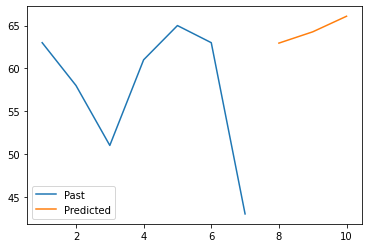

In [45]:
plt.plot(day_new,scaler.inverse_transform(df1[len(df1)-n_steps:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.legend(['Past','Predicted'])
# plt.plot(day_new,scaler.inverse_transform(df1[1683:]))
# plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [46]:
# # serialize model to JSON
# model_json = model.to_json()
# with open("model.json", "w") as json_file:
#     json_file.write(model_json)
# # serialize weights to HDF5
# model.save_weights("model.h5")
# print("Saved model to disk")

In [47]:
# save model and architecture to single file
model.save("model.h5")
print("Saved model to disk")

Saved model to disk


**MANUAL TESTING**

In [177]:
# demonstrate prediction for next 14 days
#fut_pred is the number of days into the future that is to be predicted 
def lstm_model(sample_input):
    
    fut_pred=3
    lst_output=[]
    n_steps=X_train.shape[1]
#     temp_input=sample_input
    sample_input=np.array(sample_input).reshape(1,-1)
    mn = 20
    mx = 352
    sample_input=(sample_input- mn)/ (mx - mn)
    temp_input=sample_input[0].tolist()
    print(sample_input)
    i=0
    while(i<fut_pred):

        if(len(temp_input)>n_steps):
            #print(temp_input)
            x_input=np.array(temp_input[1:])
            #print("{} day input {}".format(i,x_input))
            x_input=x_input.reshape(1,-1)
            x_input = x_input.reshape((1, n_steps, 1))
            #print(x_input)
            yhat = model.predict(x_input, verbose=0)
            #print("{} day output {}".format(i,yhat))
            temp_input.extend(yhat[0].tolist())
            temp_input=temp_input[1:]
            #print(temp_input)
            lst_output.extend(yhat.tolist())
            i=i+1
        else:
            x_input = np.array(sample_input).reshape((1, n_steps,1))
            print(x_input)
            yhat = model.predict(x_input, verbose=0)
            print(yhat[0])
            temp_input.extend(yhat[0].tolist())
            #print(len(temp_input))
            lst_output.extend(yhat.tolist())
            i=i+1
#    print(type(lst_output))
#     lst_output=np.repeat(lst_output,n_steps,axis=-1)
#     print(lst_output[:,0])
#    return scaler.inverse_transform(lst_output)[:,0]
    flat_list = [x for xs in lst_output for x in xs]
    for i in range(len(flat_list)):
        flat_list[i]=(flat_list[i]*(352-20))+20
    print(flat_list)
    return lst_output    

In [178]:
sample_input=[198,110,90,111,89,99,100]
sample_output=lstm_model(sample_input)
print(type(sample_output))
# sample_input=scaler.fit_transform(np.array(sample_input).reshape(1,-1))
# sample_input=sample_input.reshape()
# test=model.predict(sample_input)
# test=sample_input
# test_copy=np.repeat(test,n_steps,axis=-1)
# test=scaler.inverse_transform(test_copy)[:,0]
# print(test)
print(sample_output)

[[0.53614458 0.27108434 0.21084337 0.27409639 0.20783133 0.23795181
  0.24096386]]
[[[0.53614458]
  [0.27108434]
  [0.21084337]
  [0.27409639]
  [0.20783133]
  [0.23795181]
  [0.24096386]]]
[0.26184702]
[106.9332103729248, 102.60709947347641, 101.25946140289307]
<class 'list'>
[[0.26184701919555664], [0.2488165646791458], [0.24475741386413574]]


In [ ]:
sample_input=[198,110,90,111,89,99,100]
sample_input=scaler.fit_transform(np.array(sample_input).reshape(1,-1))
sample_input

In [51]:
# valid=X_test
# valid['Predicted']=model.predict(npX_test)

In [95]:
9.00000000e+01

90.0

In [166]:
(0.26184702*(352-20))+20

106.93321064